In [180]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [181]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [182]:
# Load necessary columns
columns_to_use = ['Land Use', 'Sale Price', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Acreage', 
                  'Tax District', 'Land Value', 'Building Value', 'Total Value', 'Finished Area', 
                  'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath']

# Load the dataset using only the specified columns
df = pd.read_csv('/Users/rheajohn/Desktop/ALY6020-Predictive/week 5/Nashville_housing_data_2013_2016.csv', usecols=columns_to_use)

# Inspect the data
print(df.head())
print(df.info())

            Land Use  Sale Price Sold As Vacant  \
0  RESIDENTIAL CONDO      132000             No   
1      SINGLE FAMILY      191500             No   
2      SINGLE FAMILY      202000             No   
3      SINGLE FAMILY       32000             No   
4      SINGLE FAMILY      102000             No   

  Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                No      NaN                      NaN   
1                                No     0.17  URBAN SERVICES DISTRICT   
2                                No     0.11       CITY OF BERRY HILL   
3                                No     0.17  URBAN SERVICES DISTRICT   
4                                No     0.34  URBAN SERVICES DISTRICT   

   Land Value  Building Value  Total Value  Finished Area Foundation Type  \
0         NaN             NaN          NaN            NaN             NaN   
1     32000.0        134400.0     168300.0     1149.00000         PT BSMT   
2     34000.0        15

In [183]:
# Check for missing values
print(df.isnull().sum())

Land Use                                 0
Sale Price                               0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
Acreage                              30619
Tax District                         30619
Land Value                           30619
Building Value                       30619
Total Value                          30619
Finished Area                        32470
Foundation Type                      32472
Year Built                           32471
Exterior Wall                        32471
Grade                                32471
Bedrooms                             32477
Full Bath                            32359
Half Bath                            32490
dtype: int64


In [184]:
# Impute missing numerical values with the median
df['Acreage'].fillna(df['Acreage'].median(), inplace=True)
df['Land Value'].fillna(df['Land Value'].median(), inplace=True)
df['Building Value'].fillna(df['Building Value'].median(), inplace=True)
df['Finished Area'].fillna(df['Finished Area'].median(), inplace=True)
df['Total Value'].fillna(df['Total Value'].median(), inplace=True)
df['Year Built'].fillna(df['Year Built'].median(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)
df['Full Bath'].fillna(df['Full Bath'].median(), inplace=True)
df['Half Bath'].fillna(df['Half Bath'].median(), inplace=True)


/var/folders/2z/d6h5crsj3fv3lyxyqy3090p80000gn/T/ipykernel_55697/1896586319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Acreage'].fillna(df['Acreage'].median(), inplace=True)
/var/folders/2z/d6h5crsj3fv3lyxyqy3090p80000gn/T/ipykernel_55697/1896586319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [185]:
# Impute missing categorical values with the most frequent value (mode)
df['Foundation Type'].fillna(df['Foundation Type'].mode()[0], inplace=True)
df['Exterior Wall'].fillna(df['Exterior Wall'].mode()[0], inplace=True)
df['Tax District'].fillna(df['Tax District'].mode()[0], inplace=True)
df['Grade'].fillna(df['Grade'].mode()[0], inplace=True)

/var/folders/2z/d6h5crsj3fv3lyxyqy3090p80000gn/T/ipykernel_55697/2717817986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Foundation Type'].fillna(df['Foundation Type'].mode()[0], inplace=True)
/var/folders/2z/d6h5crsj3fv3lyxyqy3090p80000gn/T/ipykernel_55697/2717817986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

In [186]:
print(df.isnull().sum())

Land Use                             0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64


In [187]:
# Create 'Building Age' column
df['Building Age'] = 2024 - df['Year Built']

# Drop the 'Year Built' column
df = df.drop(columns=['Year Built'])

# Verify the new column
print(df[['Building Age']].head())

   Building Age
0          64.0
1          83.0
2          24.0
3          76.0
4         114.0


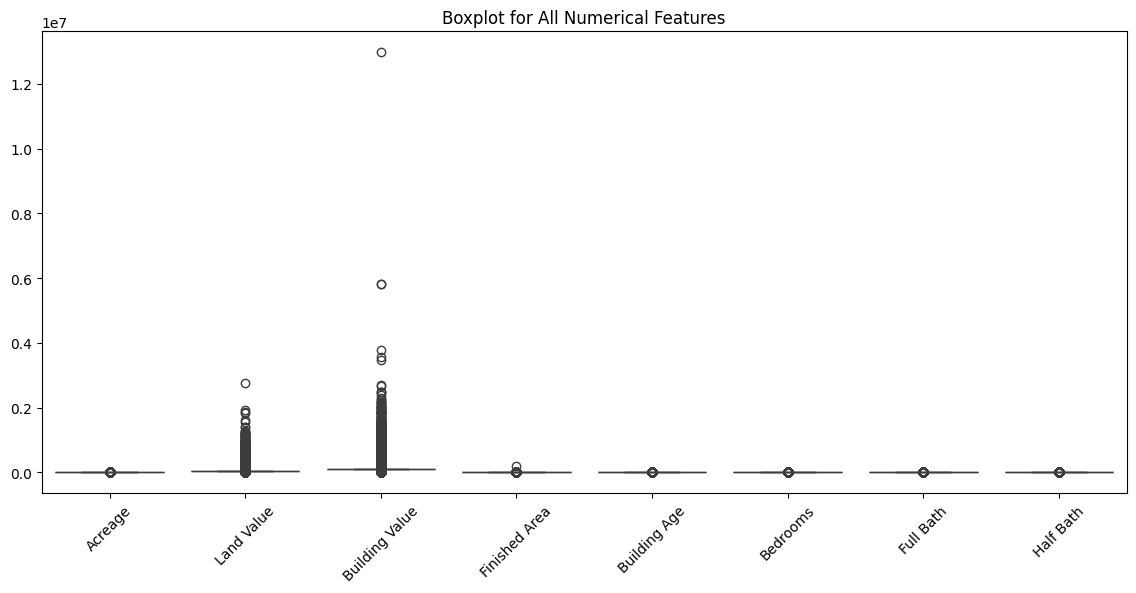

In [188]:
# Define the numerical columns
numerical_columns = ['Acreage', 'Land Value', 'Building Value', 'Finished Area', 'Building Age', 'Bedrooms', 'Full Bath', 'Half Bath']

# Create a boxplot for each numerical column in one figure
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot for All Numerical Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [189]:
# Capping outliers at 5th and 95th percentiles
for col in numerical_columns:
    lower_limit = df[col].quantile(0.05)  # 5th percentile
    upper_limit = df[col].quantile(0.95)  # 95th percentile
    df[col] = np.clip(df[col], lower_limit, upper_limit)


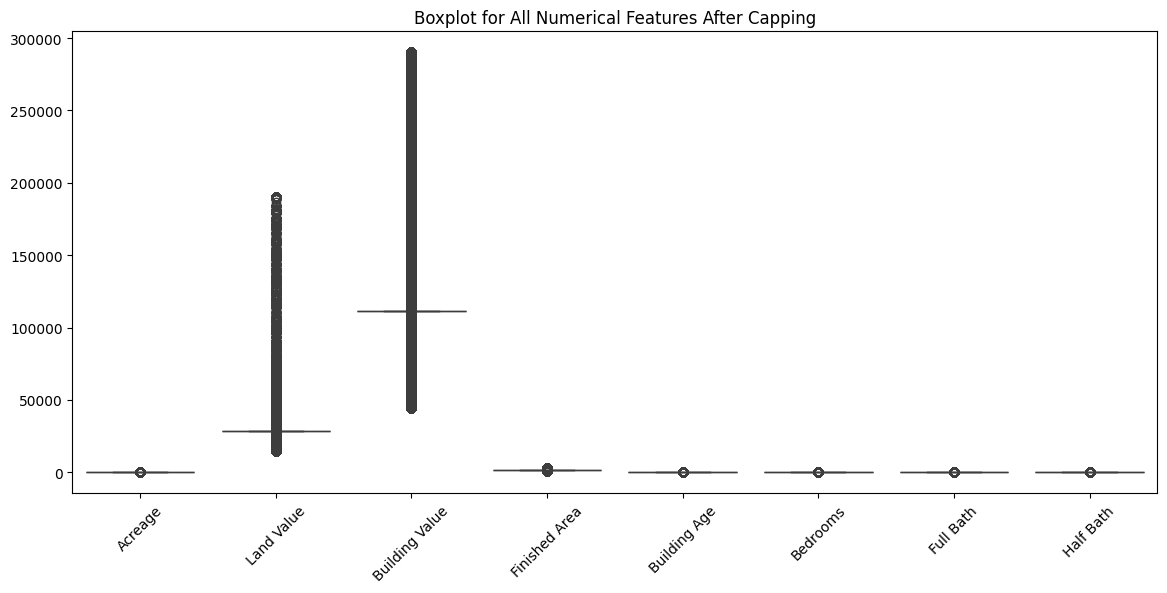

In [190]:
# Replot the boxplot for all numerical features after capping
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot for All Numerical Features After Capping')
plt.xticks(rotation=45)
plt.show()

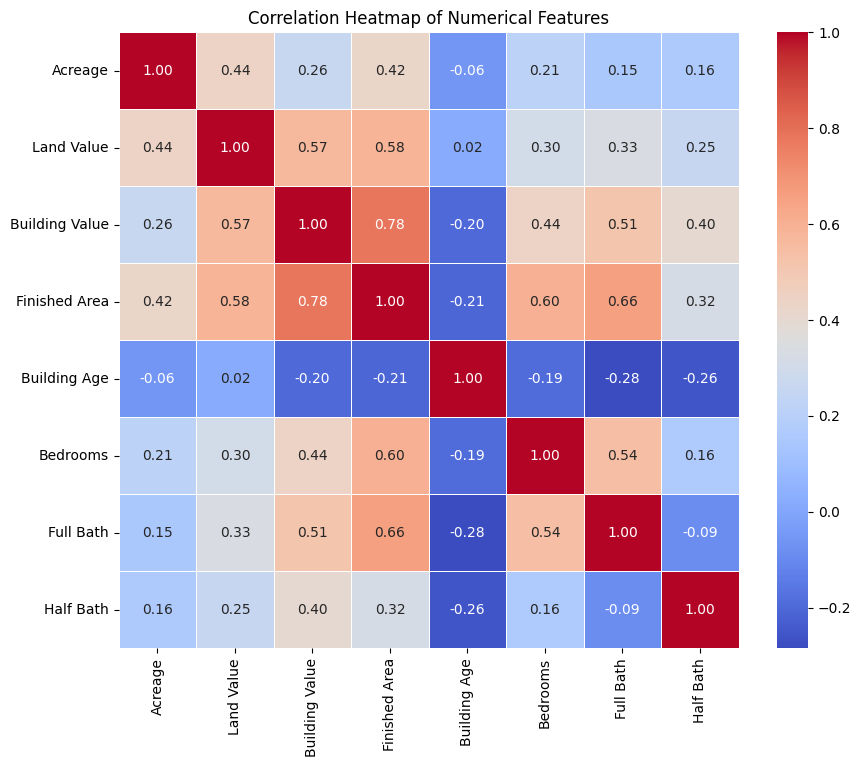

In [191]:
# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [192]:
# Create the target variable 'Overpriced'
df['Overpriced'] = (df['Sale Price'] > df['Total Value']).astype(int)

# Separate the features (X) and the target (y)
X = df.drop('Overpriced', axis=1)  # Features
y = df['Overpriced']  # Target (1 for overpriced, 0 for underpriced)

In [193]:
# Convert categorical features into dummy variables
X = pd.get_dummies(X, drop_first=True)

In [194]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns in the dataset
X_scaled = scaler.fit_transform(X) 

# Convert scaled data back into a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [195]:
import imblearn
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the new class distribution
from collections import Counter
print(f'Original dataset shape: {Counter(y)}')
print(f'Resampled dataset shape: {Counter(y_resampled)}')

Original dataset shape: Counter({1: 42799, 0: 13837})
Resampled dataset shape: Counter({0: 42799, 1: 42799})


In [196]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Logistic Regression

In [197]:
# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:\n", classification_report(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     12888
           1       1.00      0.96      0.98     12792

    accuracy                           0.98     25680
   macro avg       0.98      0.98      0.98     25680
weighted avg       0.98      0.98      0.98     25680

AUC-ROC: 0.9991468507338346


In [198]:
# Get the feature names
features = X.columns

# Get the coefficients from the Logistic Regression model
logreg_coefficients = logreg.coef_[0]  # The coefficients are in a 2D array, so we take the first (and only) row

# Create a DataFrame to map feature names to their coefficients
logreg_feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': logreg_coefficients})

# Sort the DataFrame by absolute coefficient value (largest to smallest)
logreg_feature_importance['Absolute Coefficient'] = logreg_feature_importance['Coefficient'].abs()
logreg_feature_importance = logreg_feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features by importance
print(logreg_feature_importance.head(10))  # Show top 10 features

                                    Feature  Coefficient  Absolute Coefficient
0                                Sale Price    73.614436             73.614436
4                               Total Value   -15.234619             15.234619
41          Land Use_VACANT COMMERCIAL LAND     2.393599              2.393599
18                          Land Use_FOREST     1.903910              1.903910
29                     Land Use_PARKING LOT     1.629438              1.629438
28  Land Use_ONE STORY GENERAL RETAIL STORE     1.130733              1.130733
82                               Grade_SSC     -0.976528              0.976528
21             Land Use_LIGHT MANUFACTURING     0.958531              0.958531
86                               Grade_TCD      0.945980              0.945980
76                               Grade_IDC      0.928539              0.928539


# Decision Tree

In [199]:
# Initialize and train the decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Model:\n", classification_report(y_test, y_pred_tree))
print("AUC-ROC:", roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]))

Decision Tree Model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12888
           1       0.99      0.99      0.99     12792

    accuracy                           0.99     25680
   macro avg       0.99      0.99      0.99     25680
weighted avg       0.99      0.99      0.99     25680

AUC-ROC: 0.994082661067264


# Random Forest

In [200]:
# Initialize and train the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Model:\n", classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Model:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12888
           1       0.98      0.98      0.98     12792

    accuracy                           0.98     25680
   macro avg       0.98      0.98      0.98     25680
weighted avg       0.98      0.98      0.98     25680

AUC-ROC: 0.9988739973996396


# Gradient Boosting

In [201]:
# Initialize and train the gradient boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model:\n", classification_report(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

Gradient Boosting Model:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12888
           1       0.98      0.98      0.98     12792

    accuracy                           0.98     25680
   macro avg       0.98      0.98      0.98     25680
weighted avg       0.98      0.98      0.98     25680

AUC-ROC: 0.9989409680369365


# Neural Network

In [202]:
# Initialize and train the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
print("Neural Network Model:\n", classification_report(y_test, y_pred_mlp))
print("AUC-ROC:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]))

Neural Network Model:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     12888
           1       1.00      0.98      0.99     12792

    accuracy                           0.99     25680
   macro avg       0.99      0.99      0.99     25680
weighted avg       0.99      0.99      0.99     25680

AUC-ROC: 0.9983639111521827


# Task 7

## Four key metrics for model comparison:

Accuracy: Measures the proportion of correct predictions out of all predictions.

Precision: Out of the positive predictions, how many were actually positive (useful when the cost of false positives is high).

Recall: Out of all the actual positive instances, how many were correctly predicted (useful when the cost of false negatives is high).

AUC-ROC: Measures the ability of the model to distinguish between classes across different thresholds.



| **Model**              | **Accuracy** | **Precision (Class 1)** | **Recall (Class 1)** | **F1-Score (Class 1)** | **AUC-ROC**         |
|------------------------|--------------|-------------------------|----------------------|------------------------|---------------------|
| **Logistic Regression** | 98%          | 1.00                    | 0.96                 | 0.98                   | 0.9991              |
| **Decision Tree**       | 99%          | 0.99                    | 0.99                 | 0.99                   | 0.9941              |
| **Random Forest**       | 98%          | 0.98                    | 0.98                 | 0.98                   | 0.9987              |
| **Gradient Boosting**   | 98%          | 0.98                    | 0.98                 | 0.98                   | 0.9989              |
| **Neural Network**      | 99%          | 1.00                    | 0.98                 | 0.99                   | 0.9984              |

Key Insights from Multiple Metrics:

Accuracy:
All models have very high accuracy (98-99%). However, the Decision Tree, Neural Network, and Gradient Boosting models slightly outperform Logistic Regression in this metric with 99% accuracy.

Precision (Class 1 - Overpriced Houses):
Logistic Regression and Neural Network models achieved perfect precision (1.00), meaning when these models predict a house is overpriced, they are almost always correct.
Other models also show excellent precision around 0.98-0.99, making them reliable in identifying overpriced houses.

Recall (Class 1 - Overpriced Houses):
Decision Tree has the highest recall (0.99), indicating that it correctly identifies 99% of all overpriced houses.
Logistic Regression has slightly lower recall (0.96), meaning it might miss a few overpriced houses.
Neural Network and other models are almost equally strong in recall (0.98-0.99).

F1-Score (Class 1):
This metric balances precision and recall. Decision Tree and Neural Network lead here, with a perfect balance (0.99). Logistic Regression and the ensemble methods (Random Forest, Gradient Boosting) also perform extremely well.

AUC-ROC:
Logistic Regression has the highest AUC-ROC (0.9992), indicating it’s very good at distinguishing between overpriced and underpriced houses across different thresholds.
Gradient Boosting, Random Forest, and Neural Network also perform very well with AUC-ROC scores just below 0.999.
Decision Tree shows a slight drop in AUC-ROC (0.9939), meaning it’s still strong but not quite as robust as the others in distinguishing between classes.